In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Preprocessing**

In [3]:
df.duplicated().sum()

0

In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df.shape

(918, 12)

In [6]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [7]:
df.drop(columns=['Cholesterol'], inplace=True)


**Checking for Outliers**

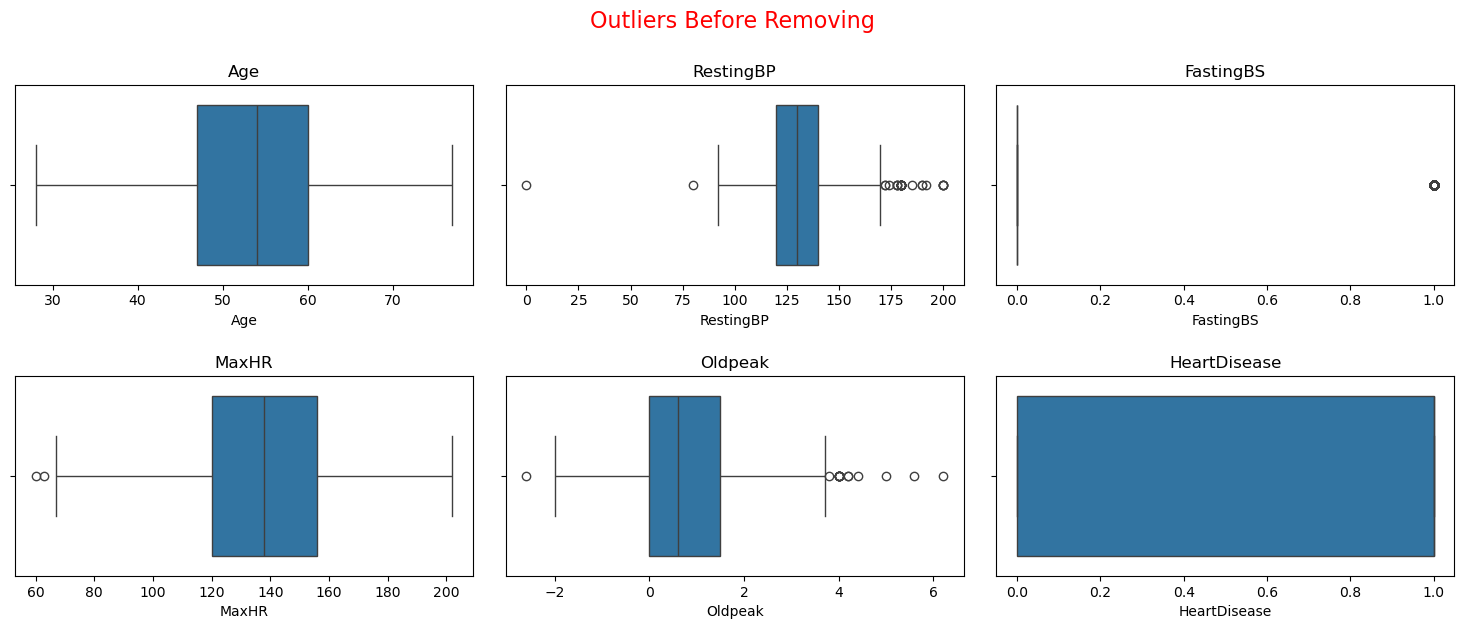

In [8]:
num_cols = df.select_dtypes(include=['int', 'float']).columns

plt.figure(figsize=(15, 12))
plt.suptitle("Outliers Before Removing", fontsize=16,color='red')

for i, col in enumerate(num_cols, 1): 
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.tight_layout(pad=2.0) 

plt.show()


**Outlier Treatment**

In [9]:
def remove_outliers_iqr(data):
    """
    Remove outliers from a 1D NumPy array using the IQR method.
    
    Parameters:
        data (np.ndarray): Input array.
        
    Returns:
        np.ndarray: Array with outliers removed.
    """
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]


In [10]:

df['RestingBP']=remove_outliers_iqr(df['RestingBP'])
# df['Cholesterol']=remove_outliers_iqr(df['Cholesterol'])
df['Oldpeak']=remove_outliers_iqr(df['Oldpeak'])
df['MaxHR']=remove_outliers_iqr(df['MaxHR'])

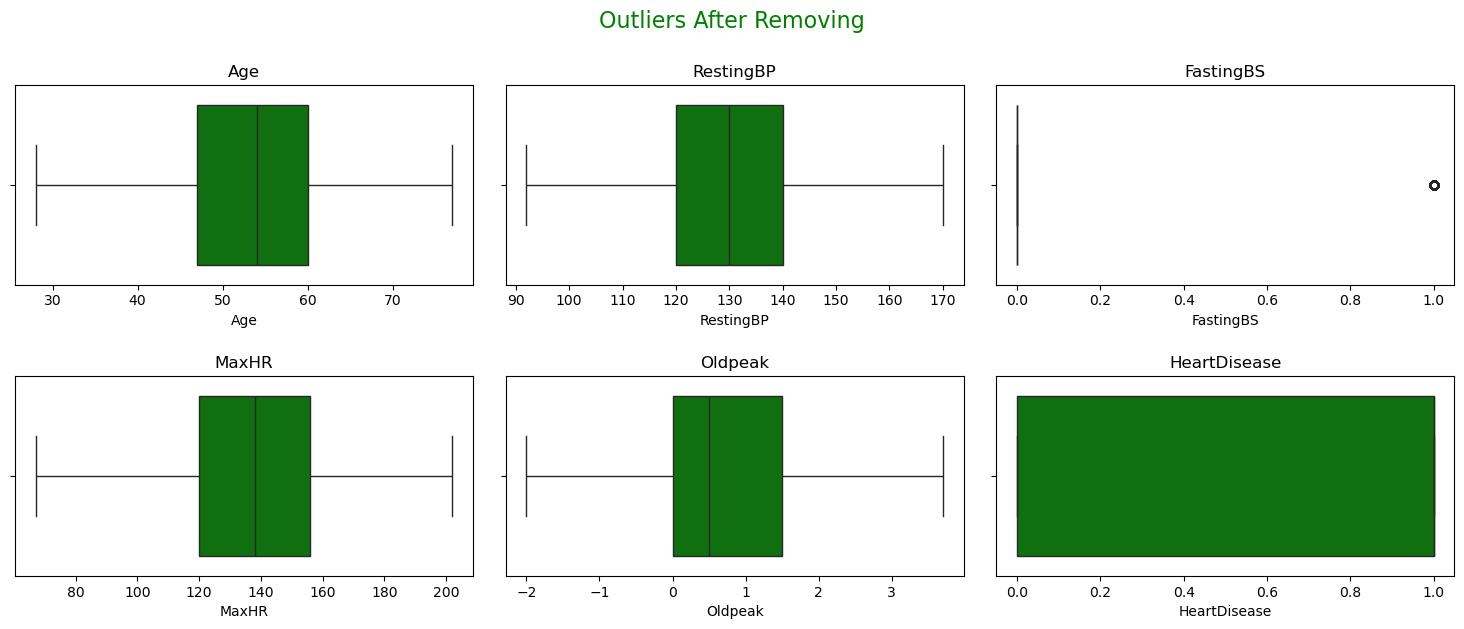

In [11]:
num_cols = df.select_dtypes(include=['int', 'float']).columns

plt.figure(figsize=(15, 12))
plt.suptitle("Outliers After Removing", fontsize=16,color='green')

for i, col in enumerate(num_cols, 1): 
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col],color="Green")
    plt.title(col)
    plt.tight_layout(pad=2.0) 

plt.show()


- Darker colors indicate stronger correlations (positive or negative).
- Lighter colors mean weaker correlations.
- Helps identify relationships between variables (e.g., Age vs. Heart Disease).


🔥 Why Is This Useful?
✅ Detects highly correlated features (which might cause redundancy).
✅ Helps in feature selection for machine learning.
✅ Useful for interpreting medical, financial, or behavioral datasets.
Would you like help customizing the heatmap further, like adjusting the color scale or filtering certain features? 😊


In [12]:
# sns.heatmap(df.corr(),annot=True,fmt='.1f')
# plt.show()

Using label Encoding We are converting categorial columns into numerical for logistic Regression

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()

In [15]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP         float64
FastingBS           int64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [16]:
df["Sex"]=le.fit_transform(df["Sex"])
df["ChestPainType"]=le.fit_transform(df["ChestPainType"])
df["RestingECG"]=le.fit_transform(df["RestingECG"])
df["ST_Slope"]=le.fit_transform(df["ST_Slope"])
df["ExerciseAngina"]=le.fit_transform(df["ExerciseAngina"])
print("LabelEncoding done!!")
le



LabelEncoding done!!


LabelEncoder()

In [17]:
df.head()

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140.0,0,1,172.0,0,0.0,2,0
1,49,0,2,160.0,0,1,156.0,0,1.0,1,1
2,37,1,1,130.0,0,2,98.0,0,0.0,2,0
3,48,0,0,138.0,0,1,108.0,1,1.5,1,1
4,54,1,2,150.0,0,1,122.0,0,0.0,2,0


In [18]:
df.isnull().sum()

Age                0
Sex                0
ChestPainType      0
RestingBP         28
FastingBS          0
RestingECG         0
MaxHR              2
ExerciseAngina     0
Oldpeak           16
ST_Slope           0
HeartDisease       0
dtype: int64

In [19]:
df.dropna(inplace=True)

In [20]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [21]:
for col in df.columns:  # Iterating over column names
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Age: [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
Unique values in Sex: [1 0]
Unique values in ChestPainType: [1 2 0 3]
Unique values in RestingBP: [140. 160. 130. 138. 150. 120. 110. 136. 115. 100. 124. 113. 125. 145.
 112. 132. 118. 170. 142. 135. 108. 155. 128. 106.  92. 122.  98. 105.
 133.  95. 137. 165. 126. 152. 116. 144. 154. 134. 104. 139. 131. 141.
 146. 158. 123. 102.  96. 143. 156. 114. 127. 101.  94. 148. 117. 129.
 164.]
Unique values in FastingBS: [0 1]
Unique values in RestingECG: [1 2 0]
Unique values in MaxHR: [172. 156.  98. 108. 122. 170. 142. 130. 120.  99. 145. 140. 137. 150.
 166. 165. 125. 160. 164. 138. 178. 112. 118. 127. 114. 154. 155.  87.
 148. 100. 168. 184. 121. 153. 134.  96. 174. 175. 144. 135. 115. 128.
 116.  94. 110.  92. 180. 152. 124. 185. 139. 190. 146. 158. 132. 176.
 119. 188. 162. 105.  90. 136. 167. 129. 102. 143. 103. 

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop(columns=["HeartDisease"], axis=1)  # Removes the column by name
y = df["HeartDisease"]  # Stores the target variable

In [24]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [27]:
model.predict(X_test)

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
      dtype=int64)

In [28]:
model.score(X_test,y_test)

0.88

below is the example of prediction

In [29]:
prediction = model.predict([[60,1,2,140.,0,1,172.,1,1.2,0]])  

if prediction[0] == 1:  # Assuming '1' means heart disease
    print("Person has heart disease")
else:
    print("Person is normal")

Person has heart disease


In [ ]:
prediction = model.predict([[50,1,1,120,1,1,140,0,1.2,2]]) 

if prediction[0] == 1:  # Assuming '1' means heart disease
    print("Person has heart disease")
else:
    print("Person is normal")

Person is normal


Confusion matrix

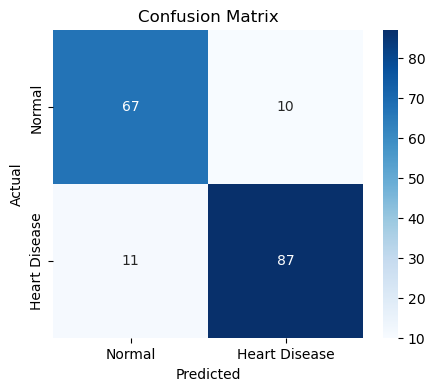

In [30]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
y_pred = model.predict(X_test)  # Get predicted labels
cm = confusion_matrix(y_test, y_pred)  # Fix input


plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Heart Disease'], yticklabels=['Normal', 'Heart Disease'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

Classification report

In [31]:
from sklearn.metrics import classification_report

# Create the classification report
report = classification_report(y_test, y_pred)


print(report)

              precision    recall  f1-score   support

           0       0.86      0.87      0.86        77
           1       0.90      0.89      0.89        98

    accuracy                           0.88       175
   macro avg       0.88      0.88      0.88       175
weighted avg       0.88      0.88      0.88       175



In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [33]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
dt.score(X_test,y_test)

0.84

In [35]:
from sklearn.svm import SVC

In [36]:
sv=SVC(C=100)
sv.fit(X_train,y_train)

SVC(C=100)

In [37]:
sv.score(X_test,y_test)

0.8742857142857143